In [1]:
import pandas as pd

In [2]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt

In [19]:
import seaborn as sns

In [3]:
df_train = pd.read_csv(r'C:\Users\PC\Desktop\Amruta\Datasets\Big Mart Sales Data\train.csv')

In [4]:
df_test = pd.read_csv(r'C:\Users\PC\Desktop\Amruta\Datasets\Big Mart Sales Data\test.csv')

In [5]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
df_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
df_train.shape

(8523, 12)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# We have 1463 null values in "Item_Weight" column which is less than 20% ((1463/8523) * 100 = 17.165317376510618) so 
# we will fill null values with mean of "Item_Weight"

In [12]:
df_train["Item_Weight"].mean()

12.857645184136183

In [ ]:
"""first of all we will find IQR. C = Q3 - Q1 where Q3=16.850000 and Q1=8.773750 hence IQR=16.850000-8.773750=8.07625
now we will calculate uppertail and lowertail
Uppertail = Q3 + 1.5 IQR = 16.850000 + 1.5*(8.07625) = 28.964375
Lowertail = Q1 - 1.5 IQR = 8.773750 - 1.5*(8.07625) = -3.34062499
from values calculated above we can see that values of 'Item_Weight' varies from -3.34062499 to 28.964375 whereas minimum
value is 4.555 and maximum value is 21.35 hence it is proved that no outliers are present in 'Item_Weight'
so now we can go for filling missing values."""


In [13]:
df_train['Item_Weight'].fillna(df_train["Item_Weight"].mean())

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [14]:
df_train['Item_Weight'].fillna(df_train["Item_Weight"].mean(),inplace=False)

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [15]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# We have 2410 null values in "Outlet_Size" column ((2410/8523) * 100 = 28.27642848762173) so 
# we will fill null values with mode of "Outlet_Size                  "

In [16]:
(2410/8523) * 100

28.27642848762173

<Axes: >

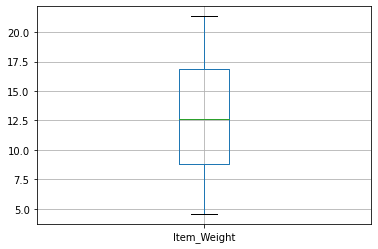

In [17]:
df_train[['Item_Weight']].boxplot()

In [20]:
df_train[['Item_Weight']].describe()

,Item_Weight
count,7060.000000
mean,12.857645
std,4.643456
min,4.555000
25%,8.773750
50%,12.600000
75%,16.850000
max,21.350000


In [21]:
df_train[['Outlet_Size']].describe()

,Outlet_Size
count,6113
unique,3
top,Medium
freq,2793


In [ ]:
"""we will fill missing values of 'Outlet_Size' column with mode immputation as 'Outlet_Size' is a categorical column """

In [22]:
df_train[['Outlet_Size']].value_counts()

Outlet_Size
Medium         2793
Small          2388
High            932
dtype: int64

In [ ]:
'''here we can see that value_counts for Medium is more so we will fill missing values with "Medium" '''

In [23]:
df_train['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [24]:
df_train['Outlet_Size'].mode()[0]

'Medium'

In [25]:
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0],inplace=True)

In [26]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [27]:
df_train['Item_Weight'].fillna(df_train["Item_Weight"].mean(),inplace=True)

In [28]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
""" here we have immputed all the missing(null) values and now we dont have any null value"""

## Selecting features based on general requirements

In [29]:
df_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [30]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
df_train.nunique()

Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [32]:
df_train['Item_Weight'].fillna(df_train["Item_Weight"].mean(),inplace=True)

# EDA

### EDA by using Dtale library

In [ ]:
!pip install dtale

In [ ]:
import dtale

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [ ]:
f_train['Item_Visibility'] = np.where(df_train['Item_Visibility'] == 0,"NaN", df_train['Item_Visibility']).astype(float)

# Preprocessing task before model building

### 1) Label Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
df_train['Item_Fat_Content'] = le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type'] = le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size'] = le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type'] = le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type'] = le.fit_transform(df_train['Outlet_Type'])

In [35]:
df_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.000000,9,53.8614,1987,0,2,1,994.7052


In [ ]:
0	FDA15	9.30	Low Fat	0.016047	Dairy	249.8092	OUT049	1999	Medium	Tier 1	Supermarket Type1	3735.1380
1	DRC01	5.92	Regular	0.019278	Soft Drinks	48.2692	OUT018	2009	Medium	Tier 3	Supermarket Type2	443.4228
2	FDN15	17.50	Low Fat	0.016760	Meat	141.6180	OUT049	1999	Medium	Tier 1	Supermarket Type1	2097.2700
3	FDX07	19.20	Regular	0.000000	Fruits and Vegetables	182.0950	OUT010	1998	Medium	Tier 3	Grocery Store	732.3800
4	NCD19	8.93	Low Fat	0.000000	Household	53.8614	OUT013	1987	High	Tier 3	Supermarket Type1	994.7052

# Splitting our training data into train and test

In [36]:
x = df_train.drop('Item_Outlet_Sales', axis=1)

In [37]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,1,0.016047,4,249.8092,1999,1,0,1
1,5.920,2,0.019278,14,48.2692,2009,1,2,2
2,17.500,1,0.016760,10,141.6180,1999,1,0,1
3,19.200,2,0.000000,6,182.0950,1998,1,2,0
4,8.930,1,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2


In [38]:
y = df_train['Item_Outlet_Sales']

In [39]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101, test_size=0.2)

In [42]:
x_train.shape

(6818, 9)

In [43]:
x_test.shape

(1705, 9)

In [44]:
y_train.shape

(6818,)

In [45]:
x_test.shape

(1705, 9)

# Standardization

In [46]:
x.describe()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,1.369354,0.066132,7.226681,140.992782,1997.831867,1.170832,1.112871,1.201220
std,4.226124,0.644810,0.051598,4.209990,62.275067,8.371760,0.600327,0.812757,0.796459
min,4.555000,0.000000,0.000000,0.000000,31.290000,1985.000000,0.000000,0.000000,0.000000
25%,9.310000,1.000000,0.026989,4.000000,93.826500,1987.000000,1.000000,0.000000,1.000000
50%,12.857645,1.000000,0.053931,6.000000,143.012800,1999.000000,1.000000,1.000000,1.000000
75%,16.000000,2.000000,0.094585,10.000000,185.643700,2004.000000,2.000000,2.000000,1.000000
max,21.350000,4.000000,0.328391,15.000000,266.888400,2009.000000,2.000000,2.000000,3.000000


In [47]:
x.shape

(8523, 9)

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [49]:
x_train_std = sc.fit_transform(x_train)

In [50]:
x_train_std

array([[ 1.52290029, -0.57382672,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.57382672, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.97378032, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.57382672, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  0.97378032,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.57382672,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [51]:
x_test_std = sc.transform(x_test)

In [52]:
x_test_std

array([[-0.43860915, -0.57382672, -0.21609255, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 1.22570189, -0.57382672, -0.52943461, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.21845775,  0.97378032,  0.16277342, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 0.65508096, -0.57382672,  0.87824237, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.01171904, -0.57382672, -1.28409256, ..., -0.28872895,
         1.08786619,  0.98524841],
       [-1.56558548,  0.97378032, -1.09265374, ..., -0.28872895,
        -0.13870429, -0.25964107]])

# Model Building

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [54]:
lr.fit(x_train_std, y_train)

LinearRegression()

In [55]:
lr.predict(x_test_std)

array([2046.00727886, 2130.3574174 , 1207.94495492, ..., 1279.28259142,
       2360.54644239, 2351.1120096 ])

In [56]:
y_pred_lr = lr.predict(x_test_std)

In [57]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [58]:
print(r2_score(y_test,y_pred_lr))

0.5041875762809336


In [59]:
print(r2_score(y_test,y_pred_lr))
print(mean_absolute_error(y_test,y_pred_lr))
print(np.sqrt(mean_squared_error(y_test,y_pred_lr)))

0.5041875762809336
880.9999067141264
1162.4412660891485


In [69]:
import pickle

In [71]:
pickle.dump(lr,open('linregmodel.pkl','wb'))

In [72]:
pickle_model=pickle.load(open('linregmodel.pkl','rb'))

In [73]:
## prediction
pickle_model.predict(x_test_std)

array([2046.00727886, 2130.3574174 , 1207.94495492, ..., 1279.28259142,
       2360.54644239, 2351.1120096 ])

In [ ]:
'''This is the same array we get we get by using pickle_model.predict(x_test_std)
array([2046.00727886, 2130.3574174 , 1207.94495492, ..., 1279.28259142,
       2360.54644239, 2351.1120096 ])

lr.predict(x_test_std)
array([2046.00727886, 2130.3574174 , 1207.94495492, ..., 1279.28259142,
       2360.54644239, 2351.1120096 ])'''

# Random forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [61]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [62]:
y_pred_rf = rf.predict(x_test)

In [63]:
print(r2_score(y_test,y_pred_rf))
print(mean_absolute_error(y_test,y_pred_rf))
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

0.5438383166101994
784.2279546920822
1114.991913652622


# Hyperparameter Tunning

In [64]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10,100,1000]
max_depth = range(1,31)
min_samples_leaf = np.linspace(0.1, 1.0)
max_features = ["auto", "sqrt", "log2"]
min_samples_split = np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators = n_estimators)

#cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 3 random_state = 101)

grid_search_forest = GridSearchCV(estimator = model, param_grid = grid, n_jobs = -1,
                                 scoring = 'r2', error_score = 0, verbose = 2, cv=2)

grid_search_forest.fit(x_train_std, y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.551 using {'n_estimators': 1000}
0.511 (0.006) with: {'n_estimators': 10}
0.547 (0.006) with: {'n_estimators': 100}
0.551 (0.006) with: {'n_estimators': 1000}


In [65]:
grid_search_forest.best_params_

{'n_estimators': 1000}

In [66]:
grid_search_forest.best_score_

0.5505408480936721

In [67]:
y_pred_rf_grid = grid_search_forest.predict(x_test_std)

In [68]:
r2_score(y_test, y_pred_rf_grid)

0.5488023304223247